<h1><b><center>Salary Analysis and Prediction</center></b></h1><br><br>

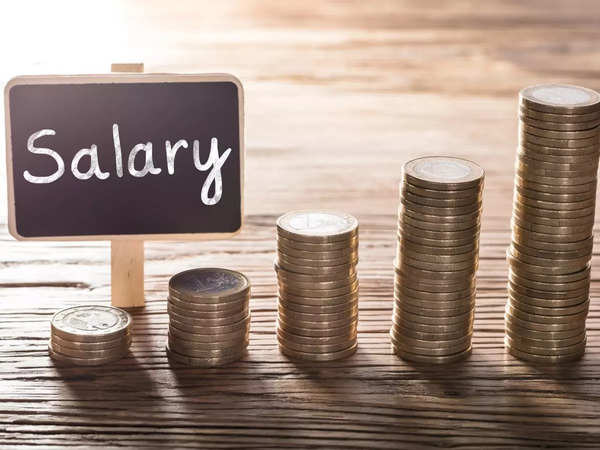


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the DataSet

In [31]:
df=pd.read_csv("SalaryData.csv") #salary data is csv dataset

## First 5 row of Dataset

In [32]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking for null values if any 

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Zero mean there is no any null values

In [33]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Statistcal values of dataset like count, mean and std

In [34]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data Visualization 

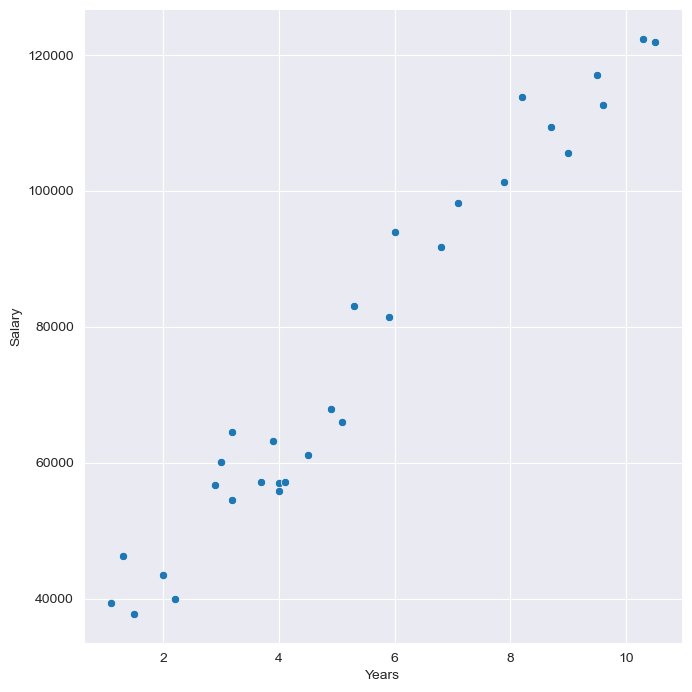

In [35]:
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary');

<Figure size 1000x1000 with 0 Axes>

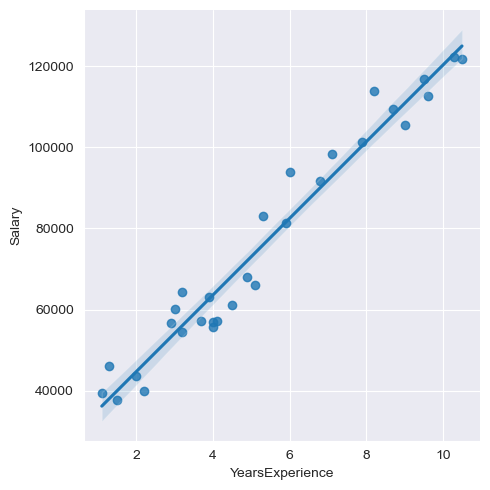

In [36]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.lmplot(x ='YearsExperience', y ='Salary', data = df); #Draw a regression plot

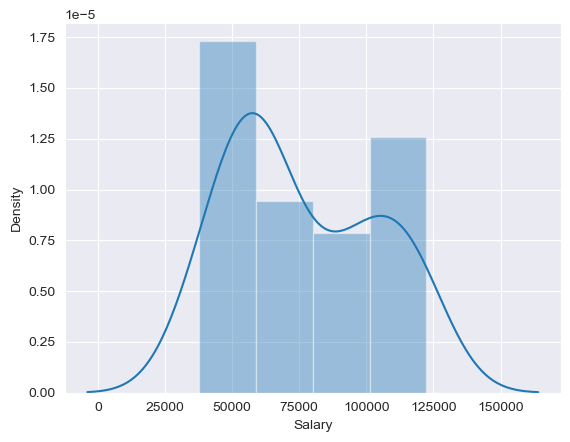

In [37]:
sns.distplot(df["Salary"]);

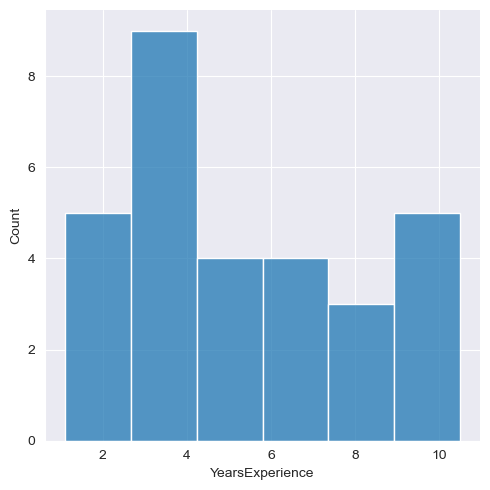

In [38]:
sns.displot(df['YearsExperience']);

## Spliting the data into train and test

In [39]:
x=df[['YearsExperience']] #x premeter indepent variable
y=df[['Salary']] #y premetere dependant variable

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train.head()

,YearsExperience
3,2.0
11,4.0
28,10.3
29,10.5
19,6.0


In [43]:
y_train.head()

,Salary
3,43525.0
11,55794.0
28,122391.0
29,121872.0
19,93940.0


## Importing Model of LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr_model=LinearRegression()

In [47]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=lr_model.predict(x_test)

In [49]:
y_pred

array([[ 68177.86691763],
       [116923.66478441],
       [ 75824.26658301],
       [ 55752.4674614 ],
       [ 72001.06675032],
       [115967.86482624]])

In [50]:
y_test['Salary']

14     61111.0
27    112635.0
17     83088.0
8      64445.0
15     67938.0
26    116969.0
Name: Salary, dtype: float64

In [52]:
result={"Actual": y_test['Salary'], "Predicted": y_pred}
result

{'Actual': 14     61111.0
 27    112635.0
 17     83088.0
 8      64445.0
 15     67938.0
 26    116969.0
 Name: Salary, dtype: float64,
 'Predicted': array([[ 68177.86691763],
        [116923.66478441],
        [ 75824.26658301],
        [ 55752.4674614 ],
        [ 72001.06675032],
        [115967.86482624]])}

In [53]:
print(f"Actual Values: {y_test['Salary']}, Predicted Value: {y_pred}")

Actual Values: 14     61111.0
27    112635.0
17     83088.0
8      64445.0
15     67938.0
26    116969.0
Name: Salary, dtype: float64, Predicted Value: [[ 68177.86691763]
 [116923.66478441]
 [ 75824.26658301]
 [ 55752.4674614 ]
 [ 72001.06675032]
 [115967.86482624]]


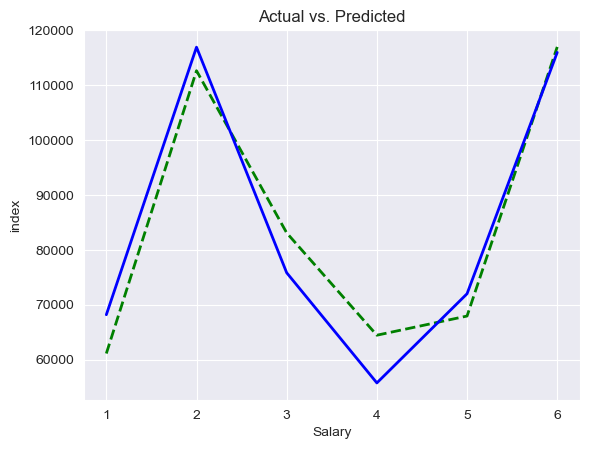

In [54]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='--',linewidth=2)
plt.plot(c,y_pred,color='b',linestyle='-',linewidth=2)
plt.xlabel('Salary')
plt.ylabel('index')

plt.title('Actual vs. Predicted');

In [55]:
#Intercept and coeff of the line
print('Intercept of the model:',lr_model.intercept_)
print('Coefficient of the line:',lr_model.coef_)

Intercept of the model: [25166.86879989]
Coefficient of the line: [[9557.99958172]]


<h1><b>Y = 26748.48 + 9438.04X</b></h1>